<a href="https://colab.research.google.com/github/gal1804/Income-Prediction/blob/main/Income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def workclass_arrange(df):
    #function simplifying workclass column
    if df['workclass'] == 'Federal-gov' or df['workclass']== 'Local-gov' or df['workclass']=='State-gov': return 'govt'
    elif df['workclass'] == 'Private':return 'private'
    elif df['workclass'] == 'Self-emp-inc' or df['workclass'] == 'Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'

def plot_correlation(df, size=15):
    #correlation matrix plot function
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

def get_dummies(cat_df):
    #function which transforms categorial df to numerical
    return pd.get_dummies(cat_df, drop_first=True)

def num_cat_cols(df):
    #function which devides df to numerical and categorial dfs
    return df.select_dtypes(include=['int']), df.select_dtypes(include=['object'])

    
def count_plot(y, hue, data, title, labels):
    #countplot function
    count_plot = sns.countplot(y=y, hue=hue, data = data).set(title=title)
    plt.legend(loc='lower right', labels=['>50k', '<=50k'])
    plt.show()

def pairplot(df, xvars, yvars):
    #pairplot function
    sns.pairplot(df, x_vars=xvars, y_vars=yvars)
    plt.show()

    
def change_type(df, label, new_type):
    return df[label].astype(new_type)
    
def visualization(df):
    #Visualization function which displayes all visualizations functions
    viz_df = df.copy()
    pairplot(viz_df, X_VARS, Y_VARS)
    
    viz_df['sex']= change_type(viz_df, 'sex', int)
    viz_df['class']= change_type(viz_df, 'class', int)
    
    plot_correlation(viz_df)
    
    viz_df['sex']= change_type(viz_df, 'sex', object)
    viz_df['class']= change_type(viz_df, 'class', object)
    
    num_att_df, cat_att_df = num_cat_cols(viz_df)
    
    
    for col_name in CAT_COLS_PLOT:
        #loop to countplot several of the categorial vars vs 'class'
        if col_name == 'sex':
            count_plot(y=col_name,
                      hue='class',
                      data =  cat_att_df,
                      title = col_name + ' vs class\nmale=0\nfemale=1',
                      labels = ['>50k', '<=50k'])
        
        else:
            count_plot(y=col_name, 
                       hue = 'class', 
                       data = cat_att_df, 
                       title = col_name + ' vs class', 
                       labels = ['>50k', '<=50k'])
    
    
    train_num_att_hist = num_att_df.hist(figsize=(10,10))

In [ ]:
PATH = r'/content/drive/MyDrive/data/income_pred.csv'

In [ ]:
income_df = pd.read_csv(PATH, header='infer')

In [ ]:
income_df.head(20) #Initiall look at the data

,ID,age,workclass,fnlwgt:,education:,education-num:,marital-status:,occupation:,relationship:,race:,sex:,capital-gain:,capital-loss:,hours-per-week:,native-country:,class
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
income_df.columns = income_df.columns.str.replace('[:]', '', regex=True) #fixing all headers

# EDA and visualization 


while also making first steps in preparing the data

In [ ]:
income_df = income_df[income_df.columns[1:]] #removing ID col
class_map = {'<=50K':0,'>50K':1}
income_df['class'] = income_df['class'].map(class_map).astype(int) #changine class col values to binary
sex_map = {'Male':0, 'Female':1}
income_df['sex'] = income_df['sex'].map(sex_map).astype(int) #changine category col values to binary

In [ ]:
income_df['workclass'] = income_df.apply(workclass_arrange, axis=1)

In [ ]:
income_df.dtypes #checking types of cols see if it fits

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class              int64
dtype: object

In [ ]:
income_df.isnull().sum(axis = 0) #checking for NANs in every col - no NANs

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Discovered while insepcting the data that the value '?' occures in 3 cols. finding out number of occurrences and if possible, removing them

In [ ]:
income_df[income_df == '?'].count()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

In [ ]:
  income_df['class'].value_counts()

0    24720
1     7841
Name: class, dtype: int64

After removing all rows containing '?' in them, number of occurrences per class is still sufficient to move forward with classification

In [ ]:
income_df = income_df.replace({'?':np.nan}).dropna()

In [ ]:
income_df['class'].value_counts()

0    22654
1     7508
Name: class, dtype: int64

In [ ]:
cols_lst = list(income_df.columns)
[[col, income_df[col].nunique()] for col in cols_lst] #num of unique values in every column

[['age', 72],
 ['workclass', 4],
 ['fnlwgt', 20263],
 ['education', 16],
 ['education-num', 16],
 ['marital-status', 7],
 ['occupation', 14],
 ['relationship', 6],
 ['race', 5],
 ['sex', 2],
 ['capital-gain', 118],
 ['capital-loss', 90],
 ['hours-per-week', 94],
 ['native-country', 41],
 ['class', 2]]

In [ ]:
'''
unique values in education-num columns associated to unique values in education columns
it's possible to drop one of them, they're interpreted the same
'''

income_df.groupby('education').apply(lambda x: x['education-num'].unique())

education
10th             [6]
11th             [7]
12th             [8]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
Assoc-acdm      [12]
Assoc-voc       [11]
Bachelors       [13]
Doctorate       [16]
HS-grad          [9]
Masters         [14]
Preschool        [1]
Prof-school     [15]
Some-college    [10]
dtype: object

In [ ]:
'''
droping 'fnlwgt:' as well since I belive it's not relevant to predict the income
'''

income_df = income_df.drop(['education', 'fnlwgt'], axis=1) 
income_df['education-num'] = change_type(income_df, 'education-num', object)

In [ ]:
X_VARS = ['age','education-num', 'sex', 'hours-per-week', 'class']
Y_VARS = ['age','education-num', 'sex', 'hours-per-week', 'class']

CAT_COLS_PLOT = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex']

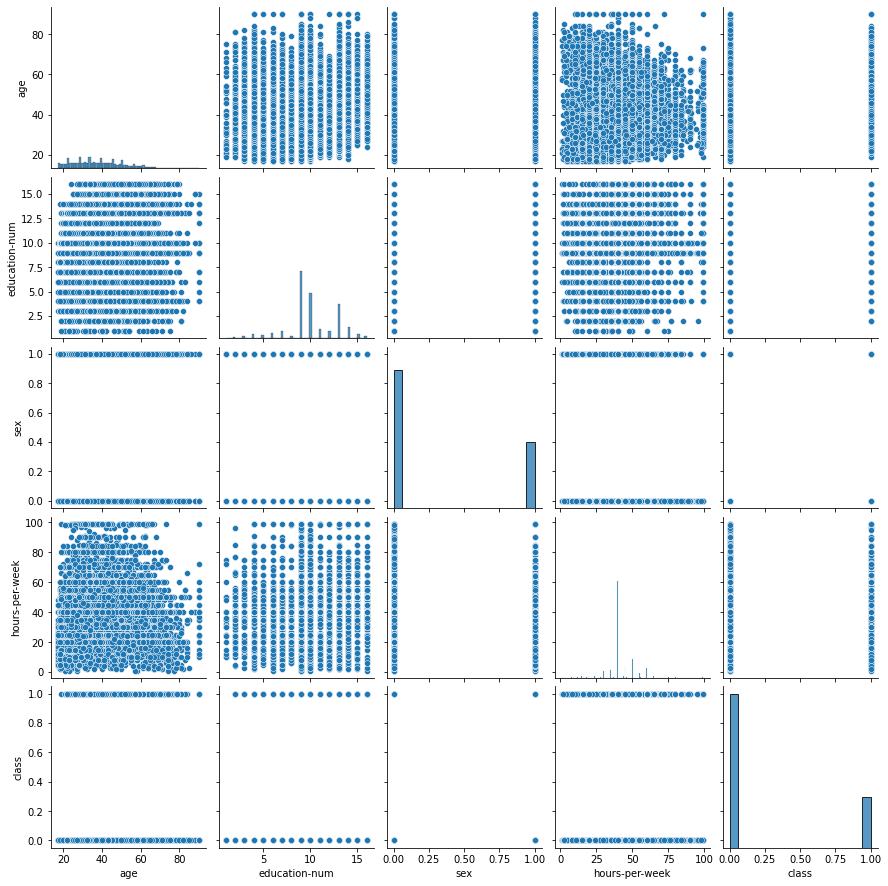

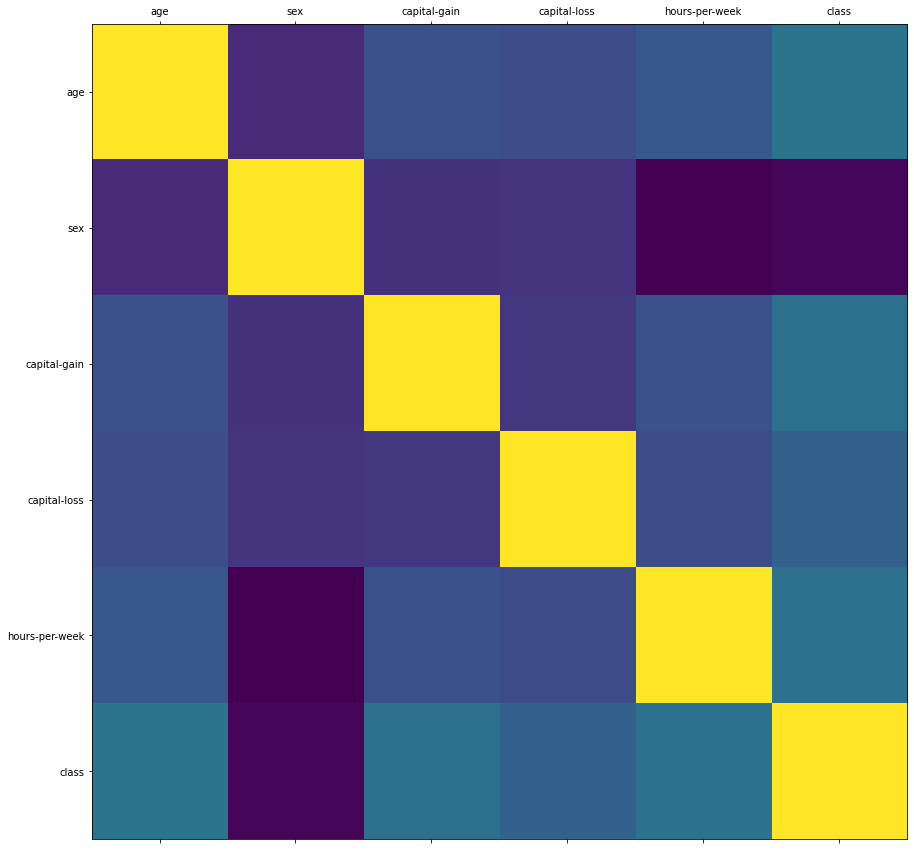

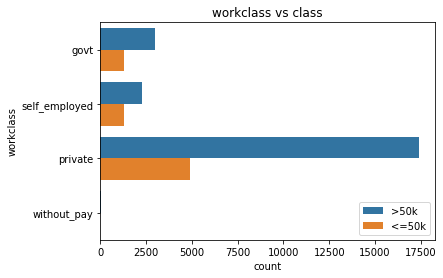

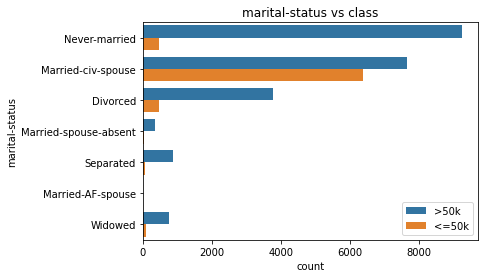

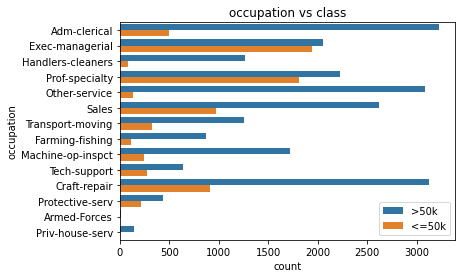

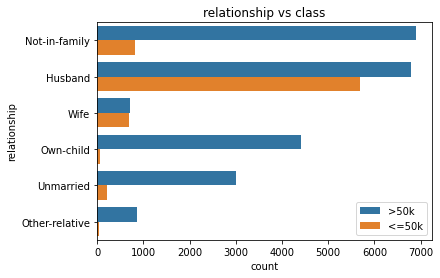

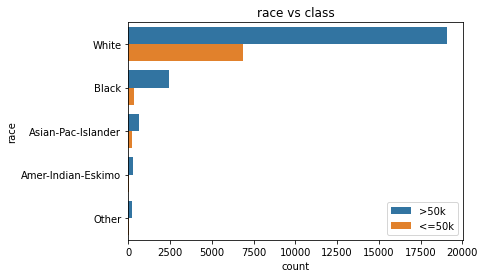

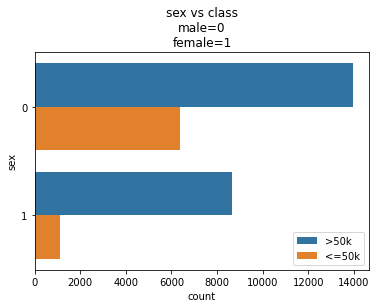

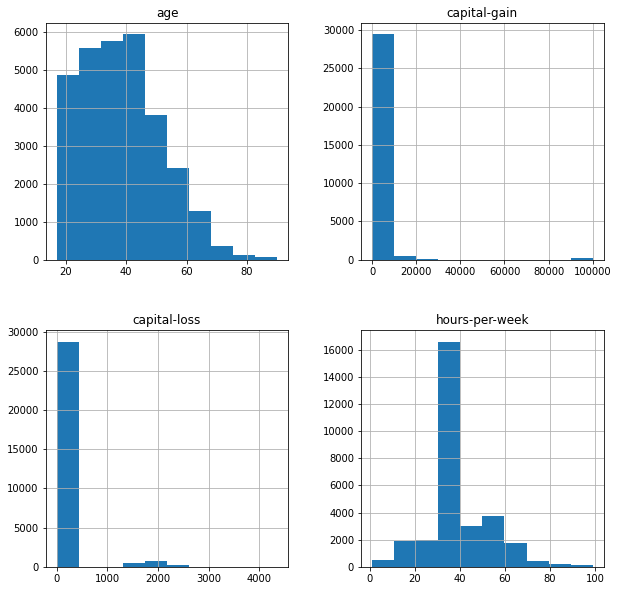

In [ ]:
visualization(income_df)

# Data Preparation

In order to transfrom the categorial data to numeric, get_dummies method will be used
This step has to be before spliting the data to train-test, since there might be a category in each feature,
which will apear in only one of the train/test sets

In [ ]:
X = income_df.drop(['class'],axis=1)
y = income_df['class']

X_num_att, X_cat_att = num_cat_cols(X)
X_cat_processed = get_dummies(X_cat_att)

X_concated = pd.concat([X_cat_processed, X_num_att], axis=1)

In [ ]:
'''
Simple models will be used, and according to 10 times rule,
there's enough data to split it to train and test and train the model
'''

X_train, X_test, y_train, y_test = train_test_split(X_concated, y, shuffle=True, random_state=42)

There's a need to normalize the numerical variables, since they're not at the same scale,
and no matter which model will be chosen, it will damage the results

sk-learn standartScaler will be used

In [ ]:
X_NUM_COLS = X_num_att.columns
X_CAT_COLS = X_cat_processed.columns


scaler = StandardScaler()
scaler.fit(X_train[X_NUM_COLS])
X_train_num_scaled = pd.DataFrame(scaler.transform(X_train[X_NUM_COLS]), columns = X_NUM_COLS)        
X_train_num_scaled= X_train_num_scaled.set_index(X_train.index)

In [ ]:
X_train_processed = pd.concat([X_train_num_scaled, X_train[X_CAT_COLS]], axis=1)

# Modeling

Logistic Regression was the model choson, although more complex models can probably give better results,
Logistic Regression is a good model for binary classification

In [ ]:
y_train = y_train.reset_index(drop=True)
y_train=y_train.astype('int')
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train_processed, y_train.values.ravel())

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
'''
transforming numerical test data based on the fit which was mase on the train data
'''

test_num_att, test_cat_att = num_cat_cols(X_test)
test_num_attributes_scaled = pd.DataFrame(scaler.transform(test_num_att), columns = test_num_att.columns)
X_test_num_scaled= test_num_attributes_scaled.set_index(test_num_att.index)

In [ ]:
X_test_processed = pd.concat([X_test_num_scaled, X_test[X_CAT_COLS]], axis=1)

In [ ]:
predicted_classes = model.predict(X_test_processed)

# Evaluating Performance

In [ ]:
accuracy = f'{accuracy_score(predicted_classes, y_test.values)*100:.2f}'
print(accuracy)


85.44


Confusion Matrix to understand the results better

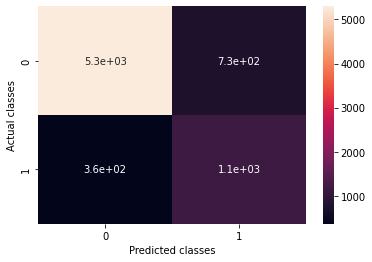

In [ ]:
cfm = confusion_matrix(predicted_classes, y_test.values)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

From the confusion matrix:

5300 from the cases were correctly identified as 0 - true-negative

1200 from the cases were correctly identified as 1 - true-positive

730 were false-positive

380 were false-negative

# Conclusion

The case presented a data set with multiple features, and the purpose was to binary classify whether a person's earning under or over 50k.

The first step was performing EDA in order to understand the data better and to make sure the data is fit to be given to a machine learning model. At this stage it was clear that some features were not relevant, so they were droped from the dataset. A decision was made to drop rows which their values consisted question marks, in thought it wouldn't affect the results much. Given more time, further interpretation of the data, same as the operation which was made on 'workclass' feature, would have been made. 

At the visualization step, some relations became clear, such as 'class'-'sex', 'hours per week'-'sex', and more.

The data preparation part was mainly to normalize the numeric and to transform categorial data to numerical in order for it to be suitable to enter the model